# Pruebas con pillow

In [1]:
from PIL import Image
import glob, os
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt

# Finalmente realizamos una funcion. 

In [2]:
def resize_image(imagen,size,output=False):
    im = Image.open(imagen)
    rgb_image = RGBA_a_RGB(im)
    im_rgb = rgb_image.resize(size)
    if not output:
        return im_rgb 
    onlyfiles = [f for f in listdir(output) if isfile(join(output, f))]
    if image not in onlyfiles:
        im.save(output)
        return im_rgb
    else:
        print("file already exists, continuing to next one") 
        return im_rgb

# Nos damos cuenta que hay imagenes RGBA, las pasamos a RGB.

Realizamos una funcion para cambiar las imagenes que sean RGBA por RGB

In [3]:
def RGBA_a_RGB(image1):
    if image1.mode == "RGBA":
        background = Image.new("RGB", image1.size, (255, 255, 255))
        background.paste(image1, mask = image1.split()[3])
        #background.save(f"{image1}", "JPEG", quality=100)
        #rgb_image = Image.open(f"{image1}")
        return background
    return image1

# Pasamos las imagenes a un df.

In [4]:
def image_to_array(image):
    im_np= np.asarray(image)
    one_line=im_np.ravel()
    return one_line

In [5]:
paths={1:"../imputs/oranges_dataset/oranges_pictures/",
      0:"../imputs/oranges_dataset/random_pictures/"}
images={}
for clas,path in paths.items():
    images[clas]=[]
    for im in listdir(path):
        if im.endswith("jpg") or im.endswith("png"):
            a=resize_image(path+im,(64,64))
            images[clas].append(np.asarray(a))
    images[clas]=np.array(images[clas])

In [6]:
X= np.concatenate(list(images.values()),axis=0)

In [7]:
y = np.concatenate([[k]* v.shape[0] for k,v in images.items()])

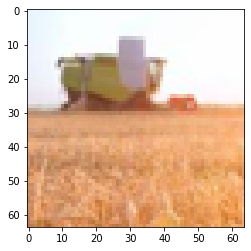

In [8]:
plt.imshow(X[525])